In [143]:
import numpy as np
import sklearn
from sklearn import model_selection
from matplotlib import pyplot as plt
%matplotlib inline

In [144]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

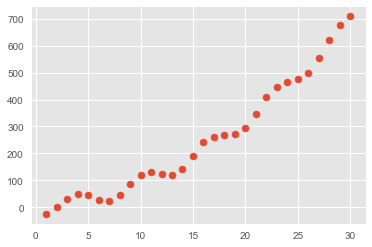

In [149]:
# 生成随机数据
np.random.seed(7)
x = np.linspace(1, 30, 30)
y = 2*x + 0.7*x**2 - 20*np.sin(x) - 20*np.cos(x) + 5*np.random.rand(30)
plt.style.use("ggplot") # 使用美观的样式
plt.scatter(x, y)

In [150]:
# 首先将数进行变换
Polynomia_7 = PolynomialFeatures(degree=7)
x_polynomia7 = Polynomia_7.fit_transform(x.reshape(-1,1))

这里转换为$x^0,x^1,x^2,...,x^7$

In [151]:
print("x:{}\nx_polynomia7:{}".format(x[1],x_polynomia7[1]))

x:2.0
x_polynomia7:[  1.   2.   4.   8.  16.  32.  64. 128.]


## 下面使用比较使用L1范数, L2范数, 和不使用 三者的区别

In [155]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=7) #设精度为3

In [153]:
# 不使用正则化
model1 = LinearRegression(normalize=True)
model1.fit(x_polynomia7,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [156]:
model1.coef_

array([  0.       ,  94.9922487, -27.263118 ,   3.9384548,  -0.296249 ,
         0.0122794,  -0.0002649,   0.0000023])

In [157]:
# 使用L1范数
model2 = Lasso(alpha=1,normalize=True)
model2.fit(x_polynomia7,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
   positive=False, precompute=False, random_state=None, selection='cyclic',
   tol=0.0001, warm_start=False)

In [158]:
model2.coef_

array([0.       , 3.3130398, 0.5545755, 0.0033182, 0.       , 0.       ,
       0.       , 0.       ])

In [159]:
# 使用L2范数
model3 = Ridge(alpha=1,normalize=True)
model3.fit(x_polynomia7,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [160]:
model3.coef_

array([0.       , 4.5850546, 0.1262109, 0.0037027, 0.0001097, 0.0000033,
       0.0000001, 0.       ])

## 画出三者的比较图与误差

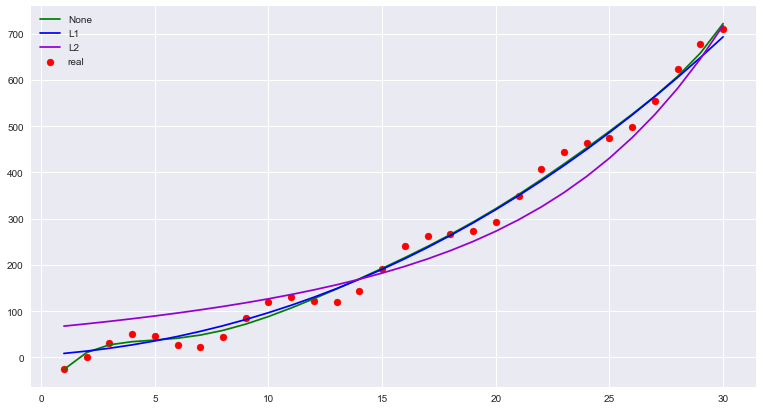

In [161]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

model1_pre = model1.predict(x_polynomia7)
model2_pre = model2.predict(x_polynomia7)
model3_pre = model3.predict(x_polynomia7)

plt.scatter(x,y,c='red',label='real') # 画出原图
plt.plot(x,model1_pre,c='green',label='None') # 未使用正则化
plt.plot(x,model2_pre,c='blue',label='L1') # l1范数
plt.plot(x,model3_pre,c='darkviolet',label='L2') # l2范数
plt.legend()

In [162]:
# 查看一下三个模型在训练集上的误差
err1 = mean_squared_error(model1_pre,y)
# 计算model2的误差
err2 = mean_squared_error(model2_pre,y)
# 计算model3的误差
err3 = mean_squared_error(model3_pre,y)
print("err1:{:.2f} | err2:{:.2f} | err3:{:.2f}".format(err1,err2,err3))

err1:348.28 | err2:438.60 | err3:2443.83


## 扩大预测范围

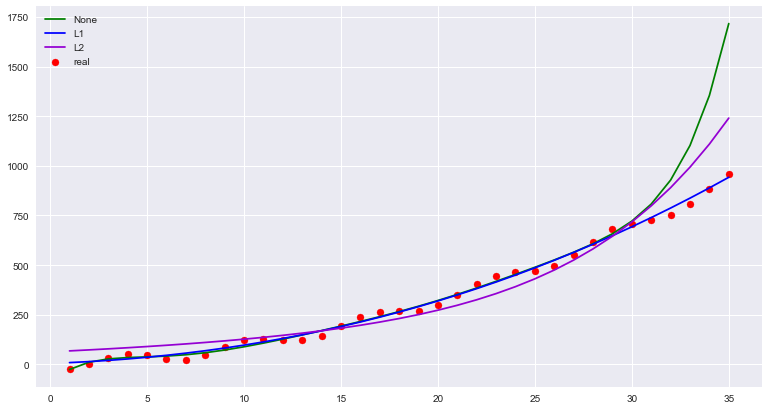

In [166]:
x_test = np.linspace(1, 35, 35)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(35)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

model1_pre = model1.predict(x_test_polynomia7)
model2_pre = model2.predict(x_test_polynomia7)
model3_pre = model3.predict(x_test_polynomia7)

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图
plt.plot(x_test,model1_pre,c='green',label='None') # 未使用正则化
plt.plot(x_test,model2_pre,c='blue',label='L1') # l1范数
plt.plot(x_test,model3_pre,c='darkviolet',label='L2') # l2范数
plt.legend()

In [167]:
# 查看一下三个模型在训练集上的误差
err1 = mean_squared_error(model1_pre,y_test)
# 计算model2的误差
err2 = mean_squared_error(model2_pre,y_test)
# 计算model3的误差
err3 = mean_squared_error(model3_pre,y_test)
print("err1:{:.2f} | err2:{:.2f} | err3:{:.2f}".format(err1,err2,err3))

err1:26570.28 | err2:428.86 | err3:7418.50


## 使用scale与normalized,与什么都不使用对结果的影响

### 使用不同规范化方式对结果的影响

In [130]:
model_no_scale = Lasso(alpha=1,normalize=False)
model_with_normalize = Lasso(alpha=1,normalize=True)
model_with_scale = Lasso(alpha=1,normalize=False)

model_no_scale.fit(x_polynomia7,y)
model_with_normalize.fit(x_polynomia7,y)
model_with_scale.fit(preprocessing.scale(x_polynomia7.astype(float)),y)

preprocess_list = ['None','Normalize','Scale']
model_preprocess_list = [model_no_scale,model_with_normalize,model_with_scale]
# 查看每个模型的参数
for i,model in zip(preprocess_list,model_preprocess_list):
    print("Preprocess={},coef={}".format(i,model.coef_))

Preprocess=None,coef=[ 0.    30.936 -4.808  0.118  0.023  0.001 -0.    -0.   ]
Preprocess=Normalize,coef=[0.    8.938 0.    0.    0.002 0.    0.    0.   ]
Preprocess=Scale,coef=[ 0.    32.524  0.     0.    11.246  0.     0.     0.   ]


e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


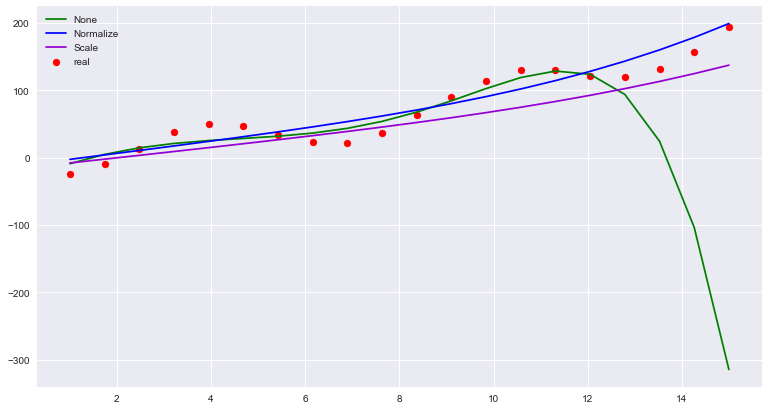

In [132]:
# 对模型进行预测
x_test = np.linspace(1, 15, 20)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(20)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

model1_pre = model_no_scale.predict(x_test_polynomia7)
model2_pre = model_with_normalize.predict(x_test_polynomia7)
model3_pre = model_with_scale.predict(preprocessing.scale(x_test_polynomia7.astype(float)))

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图
plt.plot(x_test,model1_pre,c='green',label='None') # 未进行规范化
plt.plot(x_test,model2_pre,c='blue',label='Normalize') # 进行Normalize
plt.plot(x_test,model3_pre,c='darkviolet',label='Scale') # 进行Scale
plt.legend()

## 惩罚项增大对结果的影响(是否单位话对相同的惩罚项的影响)

alpha=0.1,coef=[ 0.    41.497 -7.005  0.248  0.025  0.001 -0.    -0.   ]
alpha=0.5,coef=[ 0.    36.778 -6.022  0.189  0.024  0.001 -0.    -0.   ]
alpha=1,coef=[ 0.    30.936 -4.808  0.118  0.023  0.001 -0.    -0.   ]
alpha=2,coef=[ 0.    19.498 -2.46  -0.017  0.021  0.001 -0.    -0.   ]
alpha=5,coef=[ 0.     0.878  0.626 -0.098  0.012  0.001 -0.    -0.   ]
alpha=10,coef=[ 0.     0.     0.377 -0.032  0.01   0.001 -0.    -0.   ]
alpha=100,coef=[ 0.     0.     0.     0.     0.013  0.    -0.    -0.   ]


e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

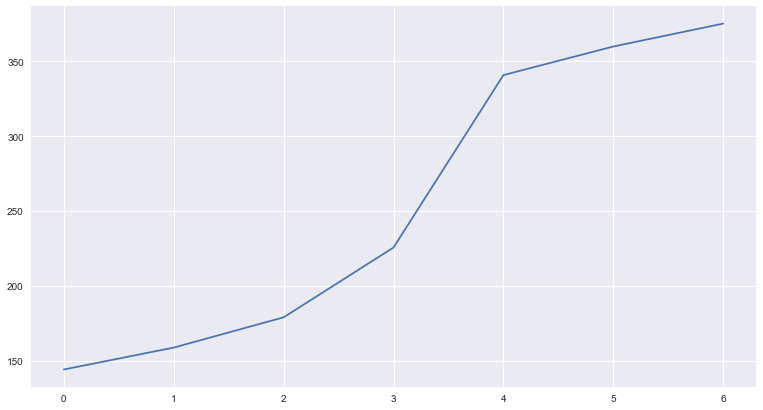

In [136]:
alpha_list = [0.1,0.5,1,2,5,10,100]
model_list_raw = [Lasso(alpha=i) for i in alpha_list]
# 分别对上面的模型进行拟合
for model in model_list_raw:
    model.fit(x_polynomia7,y)
# 打印每周模型的参数
for i,model in zip(alpha_list,model_list_raw):
    print("alpha={},coef={}".format(i,model.coef_))
# 计算每种模型的误差并绘图
err_list = []
for model in model_list_raw:
    model_pre = model.predict(x_polynomia7)
    model_err = mean_squared_error(model_pre,y)
    err_list.append(model_err)
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)
plt.plot(err_list)

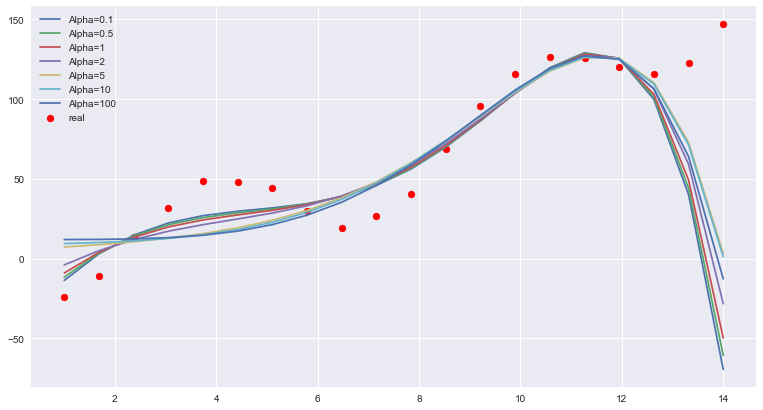

In [140]:
# 画出不同惩罚项函数的图
# 对模型进行预测
x_test = np.linspace(1, 14, 20)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(20)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图

for i,model in zip(alpha_list,model_list_raw):
    model_pre = model.predict(x_test_polynomia7)
    plt.plot(x_test,model_pre,label='Alpha={}'.format(i)) # 未进行规范化

plt.legend()

e:\program\python\python37\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


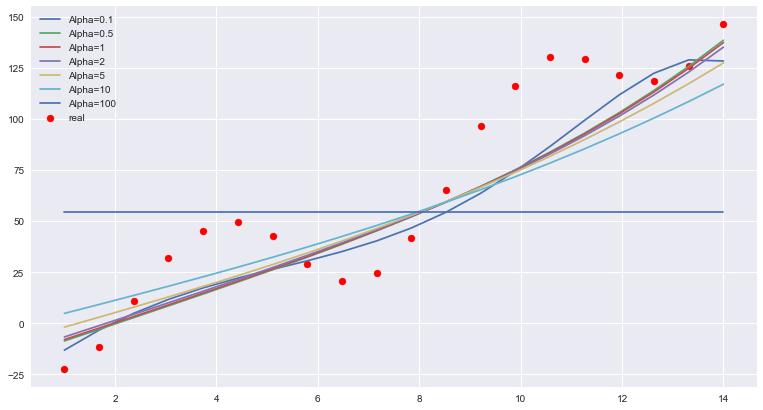

In [142]:
# 看一下如果做了scale之后的效果
# 对模型进行预测
x_test = np.linspace(1, 14, 20)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(20)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

alpha_list = [0.1,0.5,1,2,5,10,100]
model_list_scale = [Lasso(alpha=i) for i in alpha_list]
# 分别对上面的模型进行拟合
for model in model_list_scale:
    model.fit(preprocessing.scale(x_polynomia7.astype(float)),y)

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图

for i,model in zip(alpha_list,model_list_scale):
    model_pre = model.predict(preprocessing.scale(x_test_polynomia7.astype(float)))
    plt.plot(x_test,model_pre,label='Alpha={}'.format(i)) # 未进行规范化

plt.legend()

### 下面是做Normalization

alpha=0.1,coef=[0.        5.4426423 0.4530366 0.0045333 0.        0.        0.
 0.       ]
alpha=0.5,coef=[0.        4.6854673 0.477178  0.0046384 0.        0.        0.
 0.       ]
alpha=1,coef=[0.        3.3130398 0.5545755 0.0033182 0.        0.        0.
 0.       ]
alpha=2,coef=[0.        1.0515712 0.6987144 0.        0.        0.        0.
 0.       ]
alpha=5,coef=[0.        0.087827  0.6685631 0.        0.        0.        0.
 0.       ]
alpha=10,coef=[0.        0.        0.5721963 0.        0.        0.        0.
 0.       ]
alpha=100,coef=[0. 0. 0. 0. 0. 0. 0. 0.]


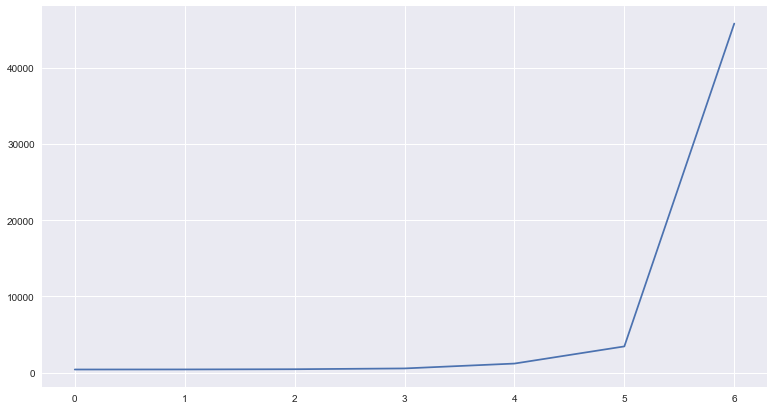

In [168]:
alpha_list = [0.1,0.5,1,2,5,10,100]
model_list_normalize = [Lasso(alpha=i,normalize=True) for i in alpha_list]
# 分别对上面的模型进行拟合
for model in model_list_normalize:
    model.fit(x_polynomia7,y)
# 打印每周模型的参数
for i,model in zip(alpha_list,model_list_normalize):
    print("alpha={},coef={}".format(i,model.coef_))
# 计算每种模型的误差并绘图
err_list = []
for model in model_list_normalize:
    model_pre = model.predict(x_polynomia7)
    model_err = mean_squared_error(model_pre,y)
    err_list.append(model_err)
plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)
plt.plot(err_list)

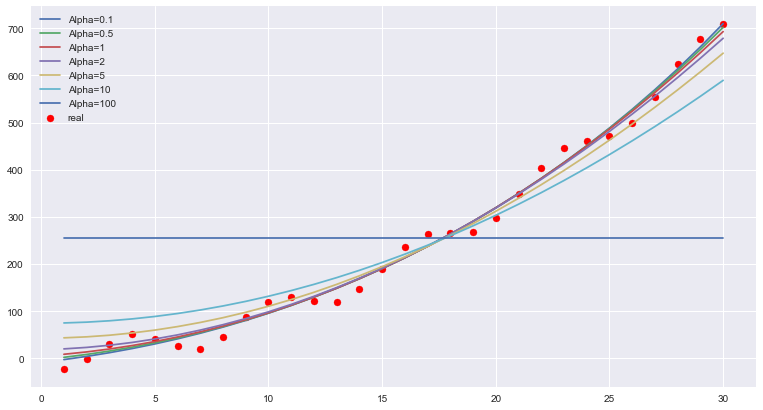

In [169]:
# 画出不同惩罚项函数的图
# 对模型进行预测
x_test = np.linspace(1, 30, 30)
y_test = 2*x_test + 0.7*x_test**2 - 20*np.sin(x_test) - 20*np.cos(x_test) + 5*np.random.rand(30)

x_test_polynomia7 = Polynomia_7.fit_transform(x_test.reshape(-1,1))

plt.style.use('seaborn')
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(1, 1, 1)

plt.scatter(x_test,y_test,c='red',label='real') # 画出原图

for i,model in zip(alpha_list,model_list_normalize):
    model_pre = model.predict(x_test_polynomia7)
    plt.plot(x_test,model_pre,label='Alpha={}'.format(i)) # 未进行规范化

plt.legend()